In [170]:
import pandas as pd
import numpy as np
from ipywidgets import interact, IntSlider, fixed
from sklearn.linear_model import LinearRegression

In [157]:
df = pd.read_csv('data/house_elections_encoded.csv').drop(columns=['Unnamed: 0'], axis=1)
dta = df
df.head(5)

,year,district,winner_name,cook_rating,dem,repub,other,winner
0,2008,AL-01,Jo Bonner,6,0.0,100.0,0.0,1
1,2008,AL-02,Bobby Bright,3,50.2,49.6,0.2,0
2,2008,AL-03,Mike D. Rogers,4,45.8,54.0,0.2,1
3,2008,AL-04,Robert Aderholt,6,25.1,74.8,0.1,1
4,2008,AL-05,Parker Griffith,3,51.5,47.9,0.6,0


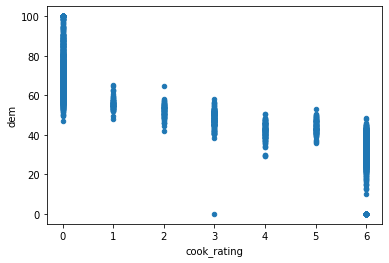

In [133]:
df.plot.scatter('cook_rating', 'dem');


**<span style="color:blue"> Question 2a) The scatter plot above plots the `cook_rating` and the percentage of votes for `dem` candidates. What does this graph tell us about the relationship between these two variables? What might we thus infer about `cook_rating`?(1 pt)**

*Your answer here*  

Below are the correlation coefficients for `cook_rating` and `dem`, and for `cook_rating` and `repub`.

In [126]:
r = np.corrcoef(df['dem'], df['cook_rating'])[0][1]
print('Correlation between percentage of democratic votes and the cook rating is: ' + str(r))

Correlation between percentage of democratic votes and the cook rating is: -0.7684776275024428


In [27]:
r = np.corrcoef(df['repub'], df['cook_rating'])[0][1]
print('Correlation between percentage of republican votes and the cook rating is: ' + str(r))

Correlation between percentage of republican votes and the cook rating is: 0.8570162700287123


**<span style="color:blue"> Question 2b) What do the correlation coefficients for each pair of attributes (`cook_rating` & `dem`, `cook_rating` & `repub`) tell us? After seeing the scatter plot and seeing the correlation, what can we infer about `cook_rating`?(1 pt)**

*Your answer here*

We can see how the correlation between `cook_rating` and `dem` is highly negative. How would the correlation change if we added one outlier? Run the function below, which generates one outlier in the data, and see how the scatter plot and correlation change.

In [161]:
def reset_data():
    data = pd.read_csv('data/house_elections_encoded.csv').drop(columns=['Unnamed: 0'], axis=1)
    return data

In [162]:
def insert_outlier(num_outliers):
    df = reset_data()
    sample_indices = df.sample(n=num_outliers).index
    for i in sample_indices:
        if df.at[i, 'cook_rating'] > 3:
            df.at[i, 'cook_rating'] = np.random.choice(4)
        else:
            df.at[i, 'cook_rating'] = np.random.choice([4, 5, 6])
    r = np.corrcoef(df['dem'], df['cook_rating'])[0][1]
    print('Correlation between percentage of democratic votes and the cook rating is: ' + str(r))
    df.plot.scatter('cook_rating', 'dem');

Correlation between percentage of democratic votes and the cook rating is: -0.85365057972917


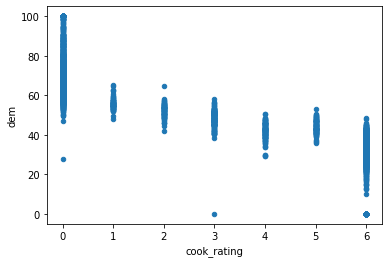

In [163]:
insert_outlier(1)

Can you see the new outlier in the scatter plot? However, we can see that the correlation did not change much. Use the interactive slider above to change the number of outliers we want to generate in the data. 

In [164]:
interact(insert_outlier, num_outliers=IntSlider(min=1, max=300, step=1, value=10));

interactive(children=(IntSlider(value=10, description='num_outliers', max=300, min=1), Output()), _dom_classes…

**<span style="color:blue"> Question 2c) How many outliers did we need to generate to notice a significant change in the correlation? How is this change reflected in the scatter plot? How much did the correlation change? Write your answer below. (1 pt)**

*Your answer here*

HEre is the output for a regression model using `dem` (the percentage of votes for a democratic candidate) as the IV and the `cook_rating` as the DV. 

In [174]:
df = reset_data()

y = np.array(df['cook_rating']).reshape(-1, 1)
X = np.array(df['dem']).reshape(-1, 1)

In [184]:
# fitting the model 

model = LinearRegression().fit(X, y)

print("The coefficient for this model is: " + str(float(model.coef_))) 
print("The intercept for this model is: " + str(float(model.intercept_)))

The coefficient for this model is: -0.10467765202395146
The intercept for this model is: 8.269314001539925


**<span style="color:blue"> Question 2d) Interpret the slope coefficient.(1 pt)**

*Your answer here*